In [109]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
def solve(A, b, max_iter=100000, tol=1e-5, method='grad'):
    n = b.shape
    x = np.zeros(n)
    
    grad = A @ x - b
    norm = np.linalg.norm(grad)
    grads = np.array([norm])
    iter = 0
    
    while iter < max_iter and norm > tol:
        step = 0
        Ar = A @ grad
        
        if method == 'grad':
            step = np.dot(grad, grad) / np.dot(Ar, grad)
        elif method == 'res':
            step = np.dot(Ar, grad) / np.dot(Ar, Ar)
        else:
            raise ValueError('wrong method')
        
        x = x - step * grad
        
        grad = grad - step * Ar
        norm = np.linalg.norm(grad)
        grads = np.append(grads, abs(norm))
        
        iter += 1
    
    return x, grads
        

In [111]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [112]:
# np.random.seed(1)

n = 120

# A = np.random.randn(n, n)
# A = A.T @ A

A = np.array([
    [-2, 1, 1],
    [1, 2, -3],
    [3, -4, 1]
])

AA = A.T @ A

# b = np.random.rand(n)

b = np.array([-3, 9, -3])
bb = A.T @ b


assert(is_pos_def(AA))
# A[:4, :4]

In [113]:
print('Итерационный способ1:')
%time 
x1, grads1 = solve(AA, bb)
print('Итерационный способ2:')
%time 
x2, grads2 = solve(AA, bb, method='res')
print('Точное решение с помощью встроенной функции:')
%time 
real_solution = np.linalg.solve(AA, bb)

Итерационный способ1:
CPU times: user 7 µs, sys: 4 µs, total: 11 µs
Wall time: 27.9 µs
Итерационный способ2:
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
Точное решение с помощью встроенной функции:
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11 µs


In [114]:
print('Первый способ:')
print(f'число итераций: {len(grads1)}')
print(f'ошибка: {np.linalg.norm(real_solution - x1)}')

Первый способ:
число итераций: 17
ошибка: 1.7320508075689645


In [115]:
print('Второй способ:')
print(f'число итераций: {len(grads2)}')
print(f'ошибка: {np.linalg.norm(real_solution - x2)}')

Второй способ:
число итераций: 17
ошибка: 1.7320508075689114


In [119]:
x1

array([ 0.99999977,  0.99999977, -1.99999955])

In [120]:
x2

array([ 0.99999986,  0.99999986, -1.99999972])

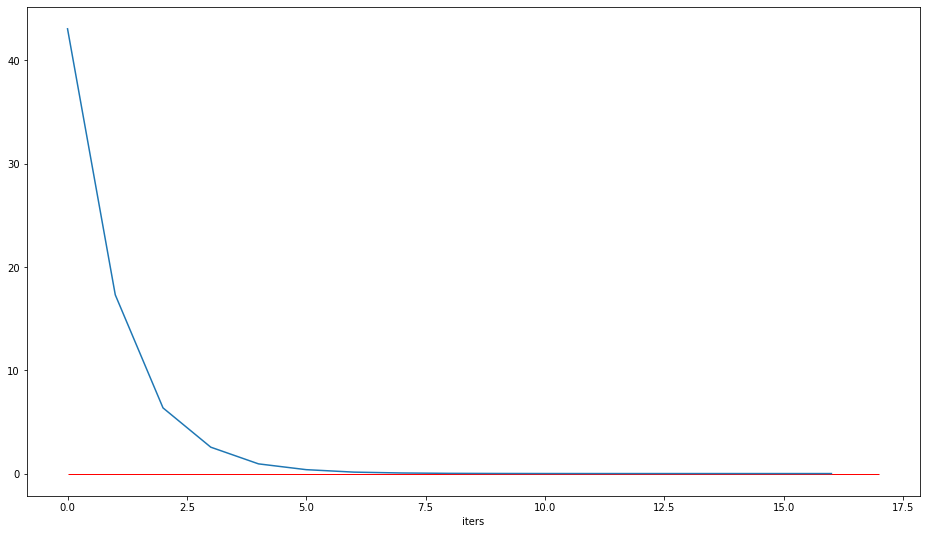

In [116]:
plt.figure(figsize=(16, 9))

plt.plot(
    np.arange(len(grads1)),
    grads1
)

plt.xlabel('iters')
plt.hlines(y=0, xmin=0, xmax=len(grads1), color="r", linewidth=1)

plt.show()

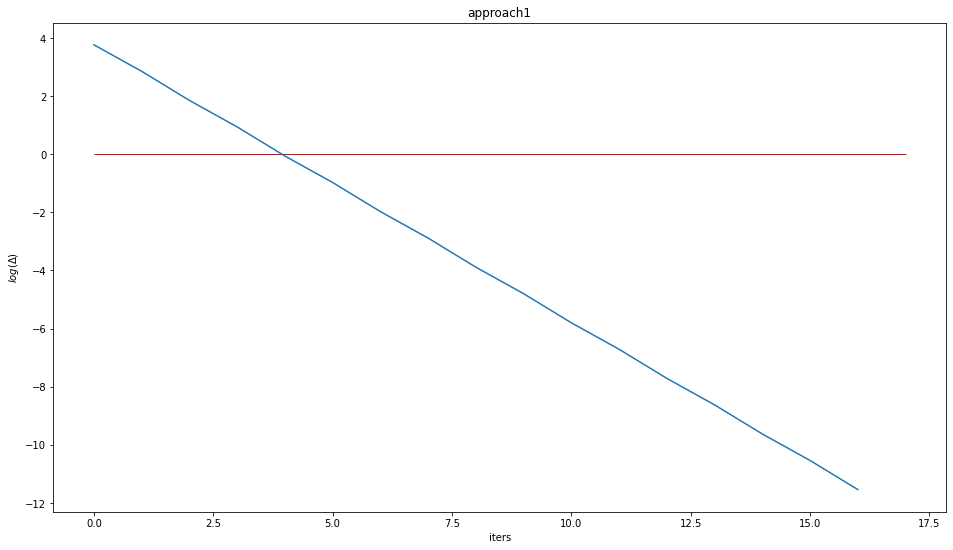

In [117]:
plt.figure(figsize=(16, 9))

plt.plot(
    np.arange(len(grads1)),
    np.log(grads1)
)

plt.title('approach1')
plt.xlabel('iters')
plt.ylabel('$log(\Delta)$')
plt.hlines(y=0, xmin=0, xmax=len(grads1), color="r", linewidth=1)

plt.show()

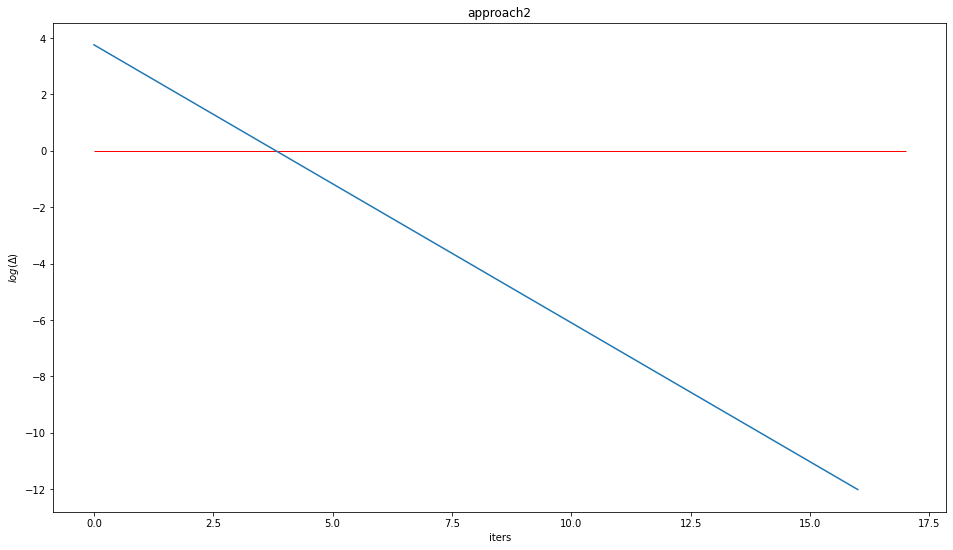

In [118]:
plt.figure(figsize=(16, 9))

plt.plot(
    np.arange(len(grads2)),
    np.log(grads2)
)

plt.title('approach2')
plt.xlabel('iters')
plt.ylabel('$log(\Delta)$')
plt.hlines(y=0, xmin=0, xmax=len(grads1), color="r", linewidth=1)

plt.show()